In [3]:
!git clone https://github.com/dreyco676/pytrends

fatal: destination path 'pytrends' already exists and is not an empty directory.


In [4]:
from pytrends.request import TrendReq
import pandas as pd
keyword = '우유'
pytrend = TrendReq(hl='en-US', tz=360, retries=10, backoff_factor=0.5)
pytrend.build_payload(kw_list=[keyword], timeframe='2019-07-01 2019-09-30')
cointrenddf = pytrend.interest_over_time()
cointrenddf=cointrenddf.iloc[:,:1]

In [5]:
cointrenddf

,우유
date,
2019-07-01,81
2019-07-02,67
2019-07-03,67
2019-07-04,83
2019-07-05,82
2019-07-06,67
2019-07-07,69
2019-07-08,97
2019-07-09,80


In [6]:
OAI = pd.read_csv("Online.csv")
oaimilk = OAI[(OAI["sech_kwd"]=="우유")]
oaimilk.shape

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(8985, 14)

In [7]:
oaimilk = oaimilk[["sess_dt","sech_kwd"]]
oaimilk['sess_dt'] = pd.to_datetime(oaimilk['sess_dt'], format='%Y%m%d')
oaimilk['milk_count'] = 1
oaimilk_date = oaimilk.groupby("sess_dt").sum()
oaimilk_date.head()

,milk_count
sess_dt,
2019-07-01,70
2019-07-02,147
2019-07-03,87
2019-07-04,73
2019-07-05,43


In [8]:
TFI = pd.read_csv("transfer.csv")
PDI = pd.read_csv("ProductInfo.csv")
merge1 = TFI.merge(PDI, on="pd_c")[["de_dt","clac_nm3"]]
merge1.dropna(inplace = True)

In [9]:
merge1 = merge1[merge1["clac_nm3"].str.contains("Milk|milk")]
merge1["clac_nm3"].factorize()


(array([0, 0, 0, ..., 6, 6, 6], dtype=int64),
 Index(['Functional Milk', 'Fresh Milk', 'Flavored Milk',
        'Cream and Condensed milk', 'General Soy Milk', 'Milk Vetch Roots',
        'Breastmilk Storage Goods'],
       dtype='object'))

In [10]:
merge1 = merge1[(merge1["clac_nm3"]!="Milk Vetch Roots")&(merge1["clac_nm3"]!="Breastmilk Storage Goods")]
tfimilk = merge1

In [11]:
tfimilk['de_dt'] = pd.to_datetime(tfimilk['de_dt'], format='%Y%m%d')
tfimilk['milk_count'] = 1
tfimilk_date = tfimilk.groupby("de_dt").sum()
tfimilk_date.head()

,milk_count
de_dt,
2019-07-01,309
2019-07-02,311
2019-07-03,323
2019-07-04,263
2019-07-05,297


In [42]:
nav = pd.read_csv("naver.csv",encoding='CP949')
nav["날짜"] = pd.to_datetime(nav['날짜'])
nav = nav.set_index("날짜")
nav.head()

,우유
날짜,
2019-07-01,84
2019-07-02,75
2019-07-03,66
2019-07-04,58
2019-07-05,49


<IPython.core.display.Javascript object>


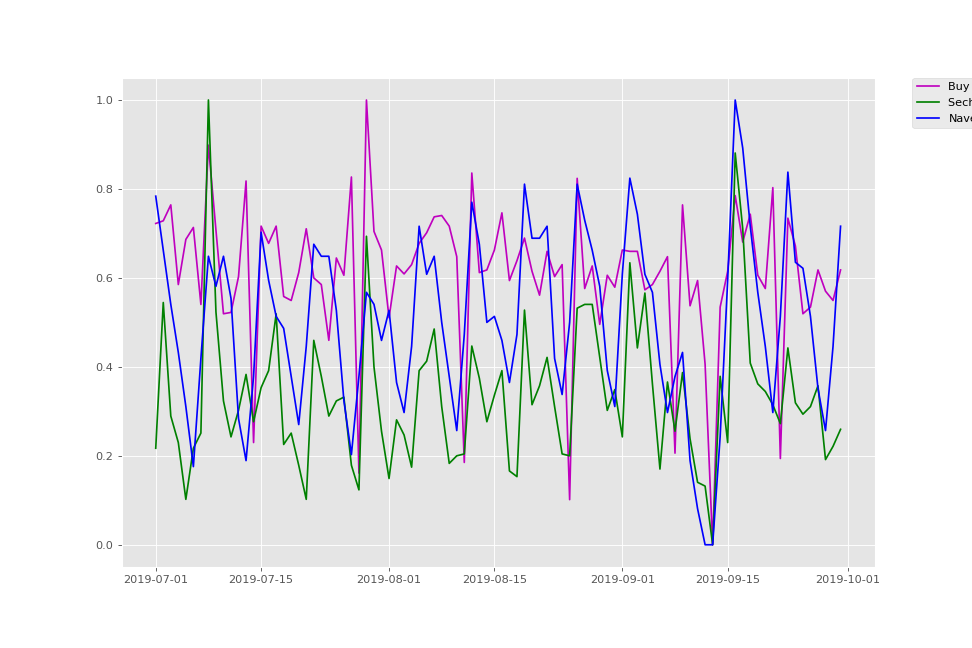

In [60]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook
tfimilkT=MinMaxScaler().fit_transform(tfimilk_date)
oaimilkT=MinMaxScaler().fit_transform(oaimilk_date)
gooT = MinMaxScaler().fit_transform(cointrenddf)
navT = MinMaxScaler().fit_transform(nav)

plt.figure(figsize = (12, 8))
plt.style.use('ggplot')
plt.plot(tfimilk_date.index, tfimilkT,c='m', label="Buy count")
plt.plot(oaimilk_date.index, oaimilkT,c='g', label="Sech count")
plt.plot(nav.index, navT, c='b', label="Naver")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [62]:
cors = pd.concat([tfimilk_date["milk_count"], oaimilk_date["milk_count"],nav["우유"]],axis=1)
cors.columns = ["buy", "sech", "naver"]
cors.corr()

,buy,sech,naver
buy,1.000000,0.480687,0.304895
sech,0.480687,1.000000,0.637799
naver,0.304895,0.637799,1.000000


In [105]:
top10 = (OAI["sech_kwd"].value_counts()).index[:10]
x = OAI[OAI["sech_kwd"].notnull()][["sess_dt","sech_kwd"]].reset_index(drop=True)
oai10 = pd.DataFrame()

for i in range(x.shape[0]):
    data = x.iloc[i,:]
    if data[1] in top10:
        oai10 = pd.concat([oai10, data],axis=0)
oai10 = oai10.reset_index(drop=True)

(651638, 2)

In [109]:
(OAI["sech_kwd"].value_counts()).index[-30:]

Index(['쿠첸블랜더', '팔레오', '유팡젖병소독기', '자연별곡', '코데ㅉ컴바인노라인팬티', '코다리쫄면', '방자유기',
       '밤비니', '게이밍모니토', '루이까또즈 선글라스 케이스', '아디다스 흰', '제이에스티나헤어핀', '미니프레즐',
       '여성시계 티소', '이글립스블러파우더팩트', '화장품 정리함 아크릴', 'tous 반지', '낙지비빔밥', 'V84GC501',
       '에콴디노 파나마햇', '사골곰탕cj', '튀김소보로', '게스YJ2D9070', '블루투스 마이크 bm1', '소갈비양녀',
       '여자블랙셔츠', '스타벅스카라멜', '모스키토 헤드넷', '티어 스노쿨링', '화장품 파우치'],
      dtype='object')